In [ ]:
# ASSIGNMENT 2: CANCER PREDCITION #
# USING LOGISTIC REGRESSION #

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
data = pd.read_csv('/content/sample_data/Cancer.csv')

In [ ]:
#displaying first few rows of the dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
#converting the target variable 'diagnosis' into binary (0 and 1)
data.diagnosis.replace({'M': 0, 'B': 1}, inplace=True)

In [ ]:
#checking for missing values
print("Initial NaN values:\n", data.isnull().sum())

Initial NaN values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_

In [ ]:
#feature selection
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [ ]:
#handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
#checking if null values present
print("NaN values after imputation:", np.isnan(X_imputed).sum())

NaN values after imputation: 0


In [ ]:
#ensuring if all data is numeric
X_imputed = X_imputed.astype(float)

In [ ]:
#checking for infinite values and replacing them with NaN
X_imputed = np.where(np.isinf(X_imputed), np.nan, X_imputed)

In [ ]:
#re-imputing any NaNs introduced from infinite replacement
X_imputed = imputer.fit_transform(X_imputed)

In [ ]:
#check for null and infinite values
print("NaN values after handling infinities:", np.isnan(X_imputed).sum())
print("Infinite values after handling infinities:", np.isinf(X_imputed).sum())

NaN values after handling infinities: 0
Infinite values after handling infinities: 0


In [ ]:
#check for any problematic values explicitly
if np.isnan(X_imputed).sum() > 0 or np.isinf(X_imputed).sum() > 0:
    print("Data still contains NaN or infinite values.")
    exit()

In [ ]:
#convert back to DataFrame to check for any remaining issues
X_clean_df = pd.DataFrame(X_imputed)
print("Data types and summary after cleaning:")
print(X_clean_df.info())
print(X_clean_df.describe())

Data types and summary after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  

In [ ]:
#droping any rows with null values if they still exist
X_clean = X_clean_df.dropna().values
y_clean = y.iloc[X_clean_df.dropna().index]

In [ ]:
#spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [ ]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#model selection and training
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
#prediction on training and testing data
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
#calculating performance metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

In [ ]:
#print performance metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



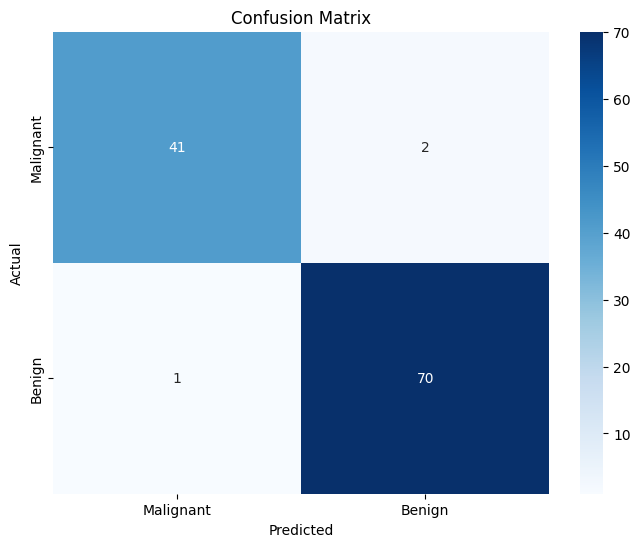

In [ ]:
#plotting the figure
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()